In [1]:
import pandas as pd 
import numpy as np

In [2]:
df1 = pd.read_csv("dataset_datahack_videos.csv")

In [3]:
import warnings

warnings.filterwarnings("ignore", category=Warning)


In [4]:
df1.head()

,Unnamed: 0.1,Unnamed: 0,index,video_id,title,description,category_id,tags,duration,view_count,likes,comments,upload_time,channel_title,thumbnail,topic_categories,Comments
0,0,0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",PT18M59S,108078,3539,840,2023-03-10T09:32:59Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...
1,1,1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",PT3M28S,2082,74,5,2023-03-29T06:30:09Z,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,"['https://en.wikipedia.org/wiki/Hobby', 'https...",['Congratulations Aswath Varun.. Way to go bro...
2,2,2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",PT13M28S,91801,5100,220,2023-03-26T05:16:10Z,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",..."
3,3,3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",PT12M50S,1059186,46367,1846,2023-03-04T07:45:08Z,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['I recently delivered a baby boy. He is 10 da...
4,4,4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",PT16M7S,155964,6147,1163,2023-03-12T07:50:52Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Pet btao and Subscribe krke Heart lelo \r IN...


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0.1      471 non-null    int64 
 1   Unnamed: 0        471 non-null    int64 
 2   index             471 non-null    int64 
 3   video_id          471 non-null    object
 4   title             471 non-null    object
 5   description       453 non-null    object
 6   category_id       471 non-null    int64 
 7   tags              471 non-null    object
 8   duration          471 non-null    object
 9   view_count        471 non-null    int64 
 10  likes             471 non-null    int64 
 11  comments          471 non-null    int64 
 12  upload_time       471 non-null    object
 13  channel_title     471 non-null    object
 14  thumbnail         471 non-null    object
 15  topic_categories  471 non-null    object
 16  Comments          471 non-null    object
dtypes: int64(7), obj

In [6]:
df1.drop("Unnamed: 0.1", axis = 1, inplace = True)
df1.drop("Unnamed: 0", axis = 1, inplace = True)

In [7]:
def remove_pt(time_str):
    return time_str.replace('PT', '')

In [8]:
df1["duration"] = df1["duration"].apply(remove_pt)

In [9]:
# define a function to convert time string to seconds
def convert_to_seconds(time_str):
    if 'H' in time_str:
        time_parts = time_str.split('H')
        hours = int(time_parts[0])
        time_str = time_parts[1]  # update time_str to exclude hours
    else:
        hours = 0
    if 'M' in time_str:
        time_parts = time_str.split('M')
        minutes = int(time_parts[0])
        time_str = time_parts[1]  # update time_str to exclude minutes
    else:
        minutes = 0
    if 'S' in time_str:
        seconds = int(time_str.rstrip('S'))
    else:
        seconds = 0
    total_seconds = hours * 3600 + minutes * 60 + seconds
    return total_seconds


# apply the function to the entire column using apply() method
df1['duration'] = df1['duration'].apply(convert_to_seconds)

In [10]:
df1.duration[0]

1139

In [11]:
from datetime import datetime

# Define function to extract date and time components
def extract_date_time(timestamp_str):
    # Convert timestamp string to datetime object
    timestamp = datetime.fromisoformat(timestamp_str.replace('Z', '+00:00'))
    # Extract date and time components
    date_str = timestamp.strftime('%Y-%m-%d')
    time_str = timestamp.strftime('%H:%M:%S')
    # Return date and time components as a tuple
    return date_str, time_str

# Apply function to entire column of dataframe
df1[['date', 'time']] = df1['upload_time'].apply(extract_date_time).apply(pd.Series)


In [12]:
df1.time[0]

'09:32:59'

In [13]:
# define a function to convert time to army time with minutes
def convert_to_army_time_with_minutes(time_str):
    dt = datetime.strptime(time_str, '%H:%M:%S')
    army_time = dt.strftime('%H:%M')
    return army_time

# apply the function to the entire column using apply() method
df1['time'] = df1['time'].apply(convert_to_army_time_with_minutes)

In [14]:
df1.time[0]

'09:32'

In [15]:
df1.drop('upload_time', axis = 1, inplace = True)

In [36]:
# define a function to extract the text after 'wiki/'
def get_wiki_text(url):
    wiki_text = url.split('wiki/')[1].split(',')[0].strip()
    if wiki_text.endswith(']'):
        wiki_text = wiki_text[:-1]
    return wiki_text

# apply the function to the 'topic_categories' column
df1['wiki_text'] = df1['topic_categories'].apply(get_wiki_text)
df1['wiki_text'] = df1['wiki_text'].str.replace("'", "")


print(df1['wiki_text']) # prints the extracted text from the URLs without commas and closing square brackets

0      Action-adventure_game
1                      Hobby
2                    Society
3      Lifestyle_(sociology)
4      Action-adventure_game
               ...          
466                Knowledge
467                 Business
468                  Society
469    Lifestyle_(sociology)
470              Action_game
Name: wiki_text, Length: 471, dtype: object


In [38]:
df1.drop("topic_categories",axis = 1, inplace = True)

In [39]:
df1.head()

,index,video_id,title,description,category_id,tags,duration,view_count,likes,comments,channel_title,thumbnail,Comments,date,time,likes_to_views_ratio,wiki_text
0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",1139,108078,3539,840,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...,2023-03-10,09:32,0.032745,Action-adventure_game
1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",208,2082,74,5,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,['Congratulations Aswath Varun.. Way to go bro...,2023-03-29,06:30,0.035543,Hobby
2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",808,91801,5100,220,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,"[""So nice explaining, can't express in words"",...",2023-03-26,05:16,0.055555,Society
3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",770,1059186,46367,1846,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['I recently delivered a baby boy. He is 10 da...,2023-03-04,07:45,0.043776,Lifestyle_(sociology)
4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",967,155964,6147,1163,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['Pet btao and Subscribe krke Heart lelo \r IN...,2023-03-12,07:50,0.039413,Action-adventure_game


<AxesSubplot:xlabel='title_length', ylabel='likes_to_views_ratio'>

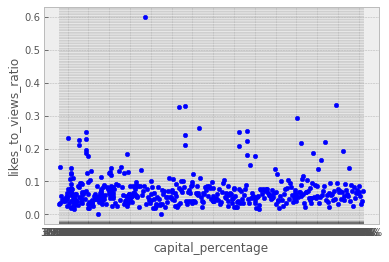

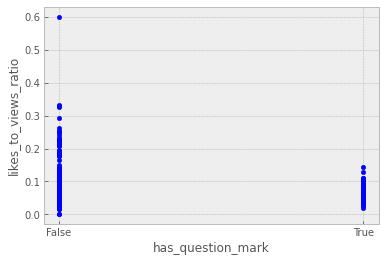

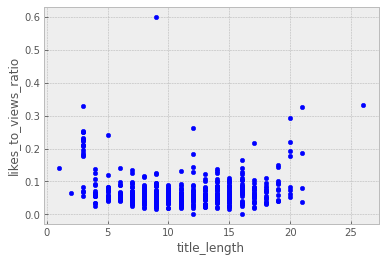

In [55]:
import pandas as pd

def getMetadataFromTitle(videoTitle):
    capitalLetterCount = 0
    spaceCharCount = 0

    videoTitleLength = len(videoTitle.split())

    if "?" in videoTitle:
        isQuestionMarkInTitle = str(True)
    else:
        isQuestionMarkInTitle = str(False)

    for char in videoTitle:
        if char.isupper():
            capitalLetterCount += 1
        elif char == " ":
            spaceCharCount += 1

    capitalLetterPercentage = str(round((capitalLetterCount / (len(videoTitle) - spaceCharCount)) * 100, 2)) + "%"
    return videoTitleLength, capitalLetterPercentage, isQuestionMarkInTitle

# read the CSV file into a pandas DataFrame
# apply the function to the 'video_title' column and create new columns to store the returned values
df1[['title_length', 'capital_percentage', 'has_question_mark']] = df1['title'].apply(lambda x: pd.Series(getMetadataFromTitle(x))) 

# convert the 'likes' and 'views' columns to numeric data types
df1['likes'] = pd.to_numeric(df1['likes'])
df1['view_count'] = pd.to_numeric(df1['view_count'])



# plot a scatter plot of 'capital percentage' vs 'likes to views ratio'
df1.plot.scatter(x='capital_percentage', y='likes_to_views_ratio')

# plot a scatter plot of 'has question mark' vs 'likes to views ratio'
df1.plot.scatter(x='has_question_mark', y='likes_to_views_ratio')

# plot a scatter plot of 'title length' vs 'likes to views ratio'
df1.plot.scatter(x='title_length', y='likes_to_views_ratio')



In [58]:
df1.corr()

,index,category_id,duration,view_count,likes,comments,likes_to_views_ratio,title_length
index,1.000000,0.020644,0.078082,0.015919,0.014817,0.022425,0.010092,0.040382
category_id,0.020644,1.000000,-0.020617,-0.418015,-0.427701,-0.421161,-0.088456,0.099099
duration,0.078082,-0.020617,1.000000,-0.045697,-0.054913,-0.036421,-0.089237,0.047699
view_count,0.015919,-0.418015,-0.045697,1.000000,0.983709,0.922035,-0.024527,-0.143616
likes,0.014817,-0.427701,-0.054913,0.983709,1.000000,0.943780,0.045424,-0.182747
comments,0.022425,-0.421161,-0.036421,0.922035,0.943780,1.000000,0.006463,-0.147796
likes_to_views_ratio,0.010092,-0.088456,-0.089237,-0.024527,0.045424,0.006463,1.000000,-0.051077
title_length,0.040382,0.099099,0.047699,-0.143616,-0.182747,-0.147796,-0.051077,1.000000


NameError: name 'category_id' is not defined

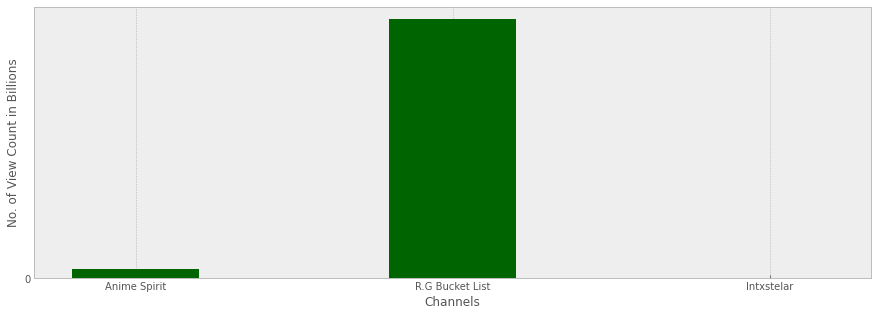

In [65]:
# group by category and get top 8 channels based on video_count
top_channels_df = df1.groupby('category_id').apply(lambda x: x.nlargest(8, 'likes_to_views_ratio')).reset_index(drop=True)

# plot bar chart for each category
for category in top_channels_df['category_id'].unique():
    category_df = top_channels_df[top_channels_df['category_id'] == category]
    fig, ax = plt.subplots(figsize =(15, 5))
    plt.bar(category_df['channel_title'], category_df['view_count'], color ='darkgreen',
            width = 0.4,)
    step_value = 250000000
    plt.yticks(np.arange(0, max(category_df['view_count']), step_value))
    plt.xlabel('Channels')
    plt.ylabel("No. of View Count in Billions")
    plt.title(f"View count of top 8 Tech channels in {category_id} category on Youtube" , fontdict= { 'fontweight' : 'bold'})
    # Add padding between axes and, labels
    ax.xaxis.set_tick_params(pad = 10)
    ax.yaxis.set_tick_params(pad = 10)
    plt.tight_layout()
    plt.show()


In [51]:
df1.head()

,index,video_id,title,description,category_id,tags,duration,view_count,likes,comments,channel_title,thumbnail,Comments,date,time,likes_to_views_ratio,wiki_text,title_length,capital_percentage,has_question_mark
0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",1139,108078,3539,840,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...,2023-03-10,09:32,0.032745,Action-adventure_game,8,37.78%,False
1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",208,2082,74,5,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,['Congratulations Aswath Varun.. Way to go bro...,2023-03-29,06:30,0.035543,Hobby,18,10.67%,False
2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",808,91801,5100,220,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,"[""So nice explaining, can't express in words"",...",2023-03-26,05:16,0.055555,Society,13,26.15%,False
3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",770,1059186,46367,1846,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['I recently delivered a baby boy. He is 10 da...,2023-03-04,07:45,0.043776,Lifestyle_(sociology),5,31.82%,False
4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",967,155964,6147,1163,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['Pet btao and Subscribe krke Heart lelo \r IN...,2023-03-12,07:50,0.039413,Action-adventure_game,10,47.73%,False


# NLP

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jasleengill/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jasleengill/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline 

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             471 non-null    int64 
 1   video_id          471 non-null    object
 2   title             471 non-null    object
 3   description       453 non-null    object
 4   category_id       471 non-null    int64 
 5   tags              471 non-null    object
 6   duration          471 non-null    int64 
 7   view_count        471 non-null    int64 
 8   likes             471 non-null    int64 
 9   comments          471 non-null    int64 
 10  channel_title     471 non-null    object
 11  thumbnail         471 non-null    object
 12  topic_categories  471 non-null    object
 13  Comments          471 non-null    object
 14  date              471 non-null    object
 15  time              471 non-null    object
dtypes: int64(6), object(10)
memory usage: 59.0+ KB


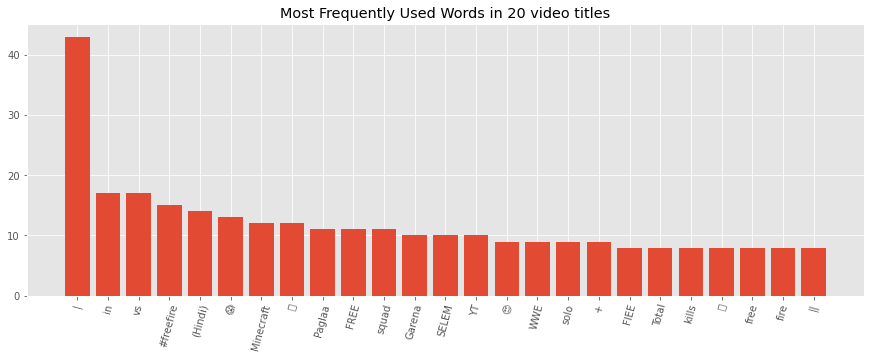

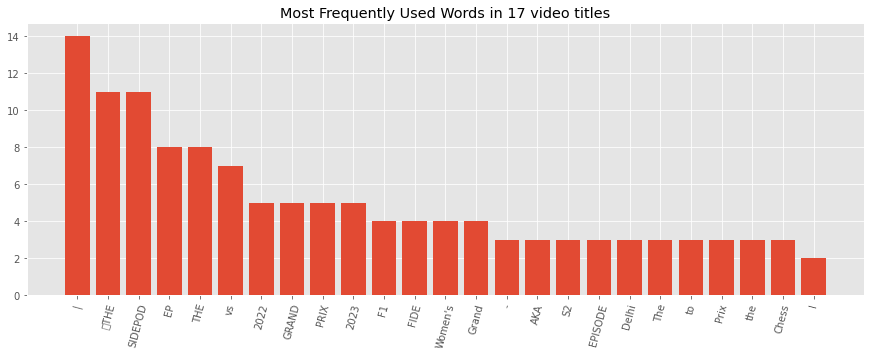

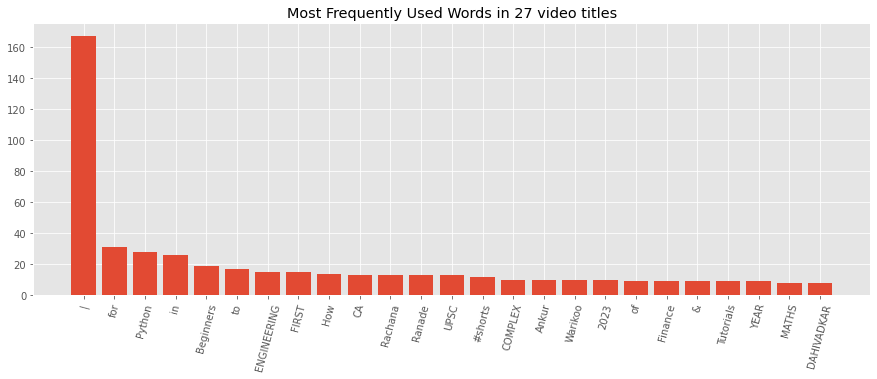

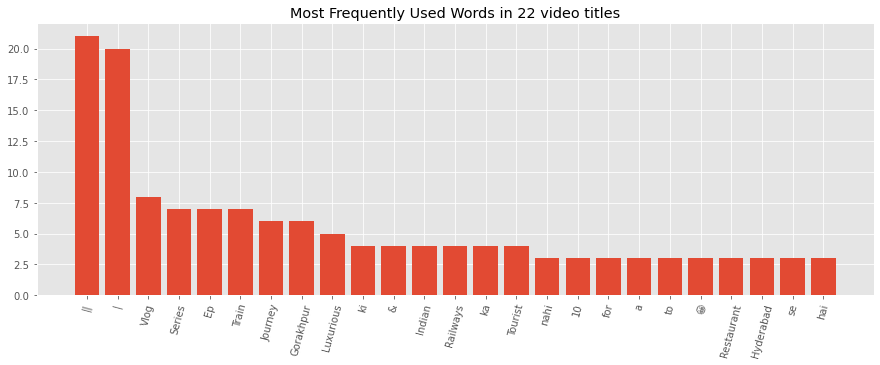

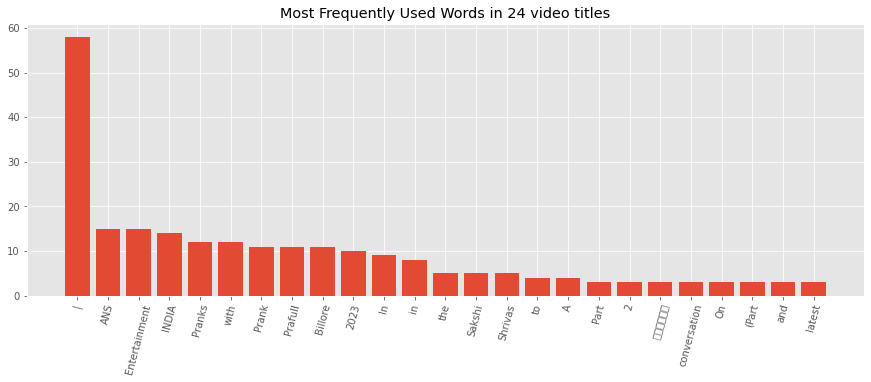

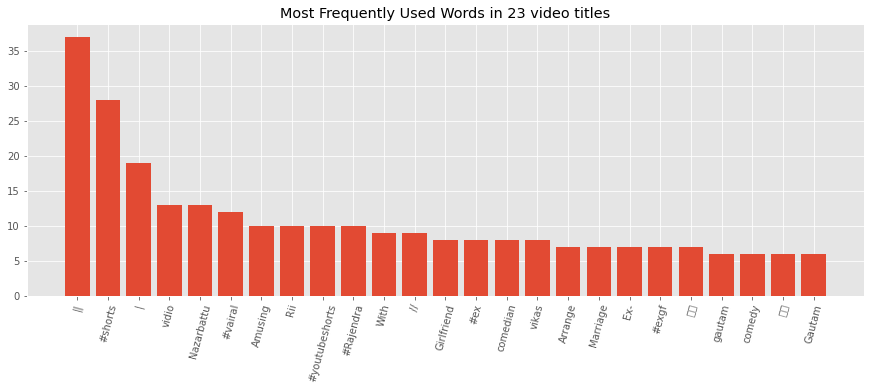

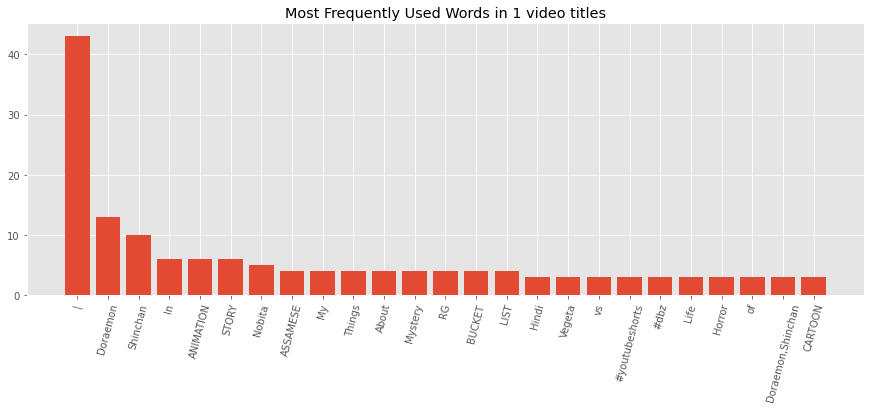

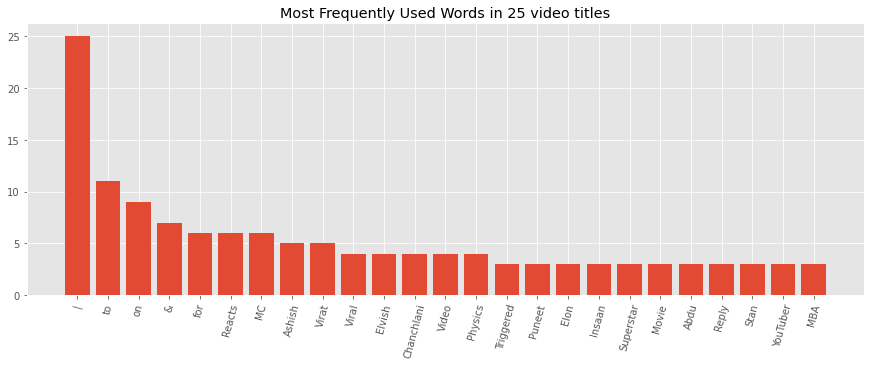

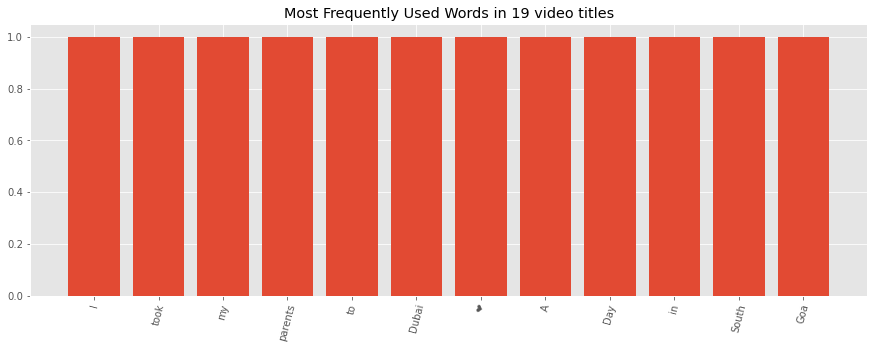

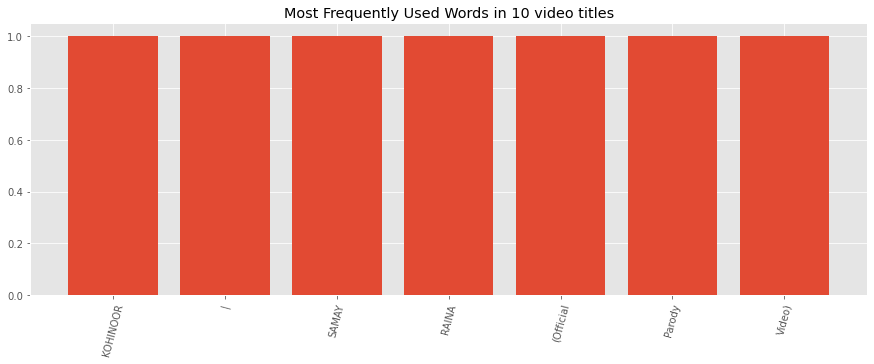

In [20]:
from nltk import FreqDist
import matplotlib.pyplot as plt

categories = df1['category_id'].unique()

for category in categories:
    # Filter the dataframe to only include titles in the current category
    titles = df1[df1['category_id'] == category]['title']
    
    # Create a set of all unique words in the titles
    total_vocab = set()
    for title in titles:
        total_vocab.update(title.split())

    # Find the most common words in the titles
    words = []
    for title in titles:
        words.extend(title.split())
    title_freq = FreqDist(words)
    common_words = title_freq.most_common(25)
    
    # Plot the most common words
    plt.style.use('ggplot')
    plt.figure(figsize=(15,5))
    plt.bar(*zip(*common_words))
    plt.xticks(rotation=75)
    plt.title(f"Most Frequently Used Words in {category} video titles")
    plt.show()


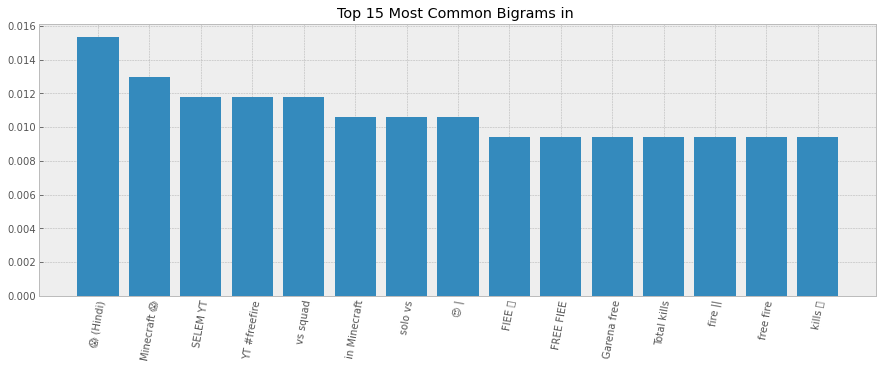

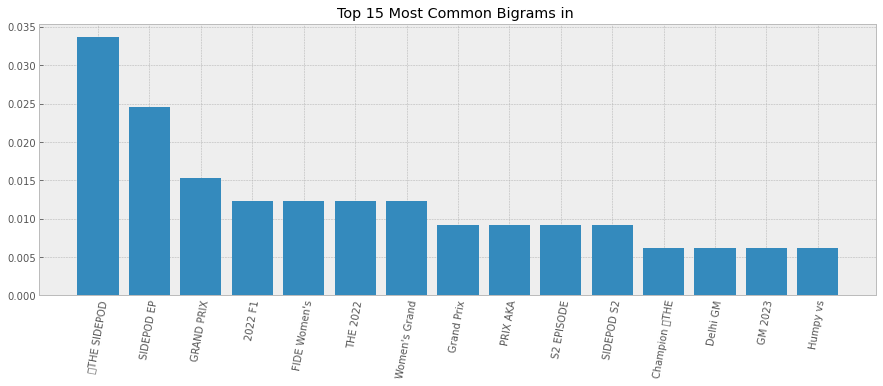

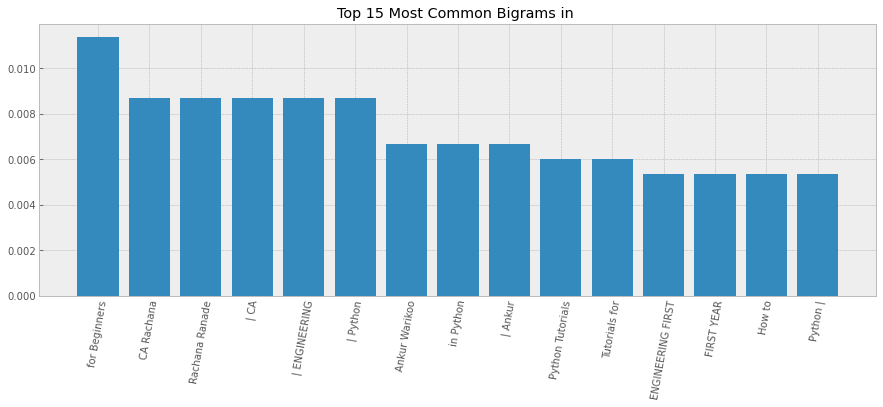

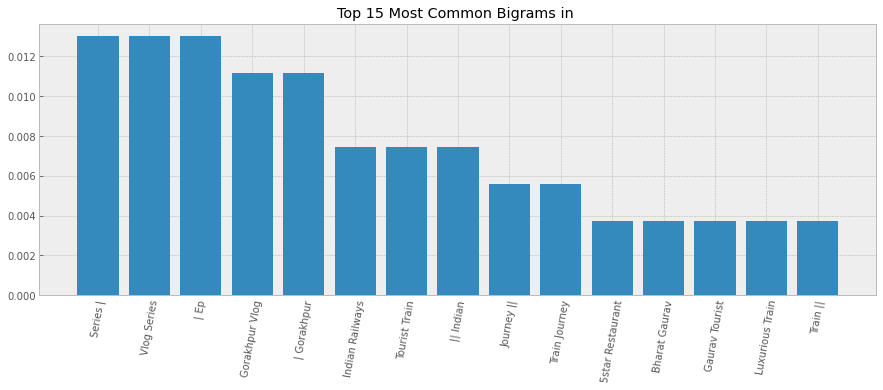

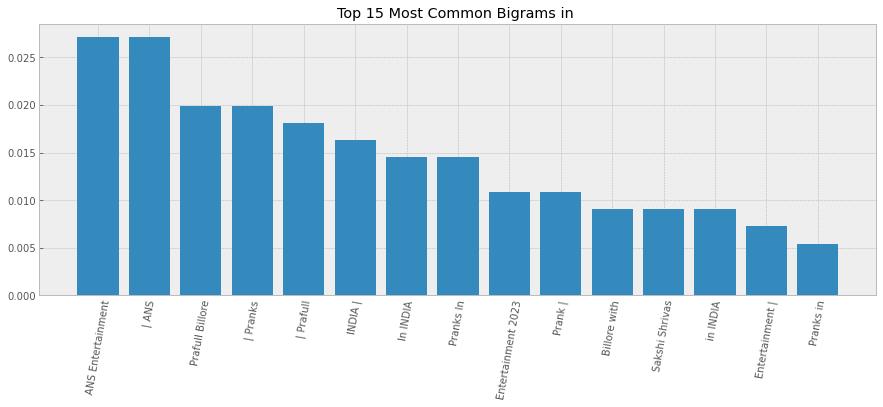

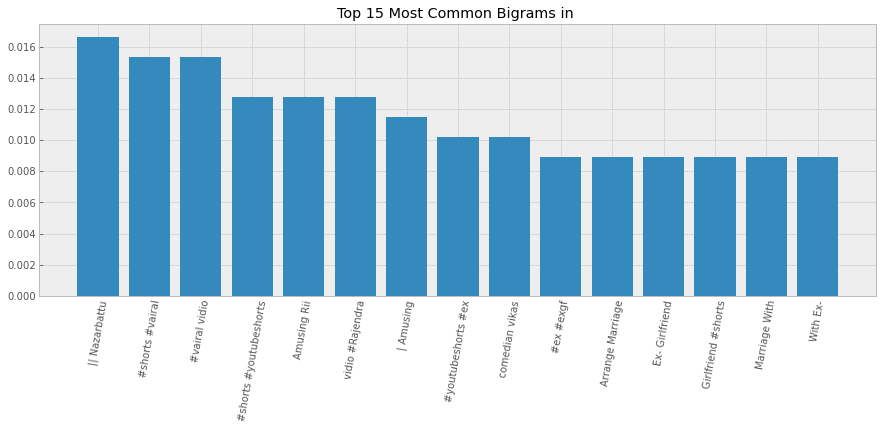

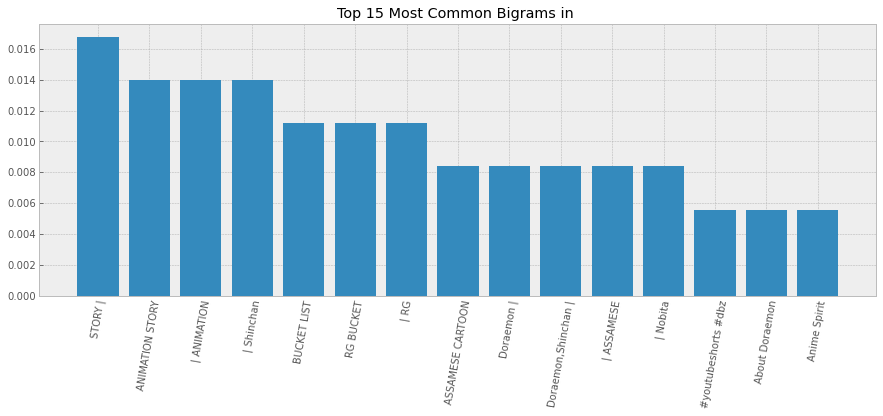

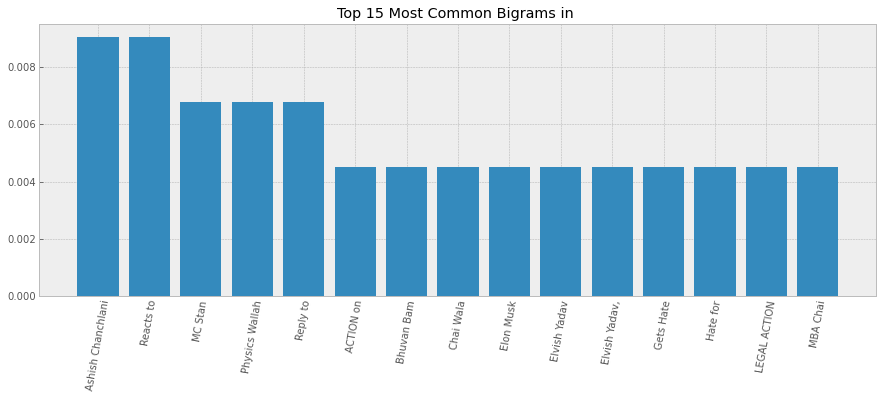

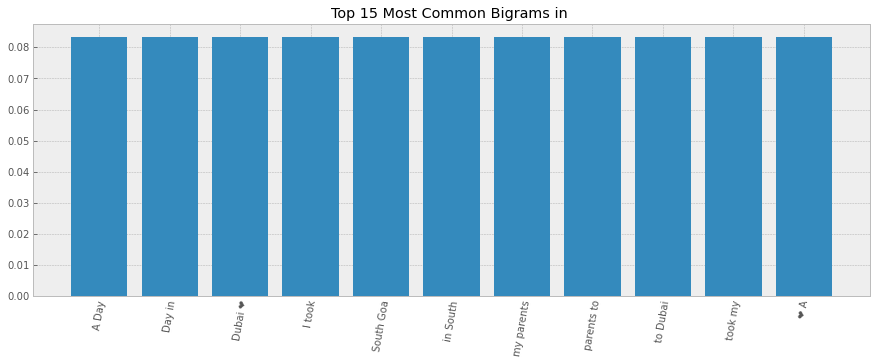

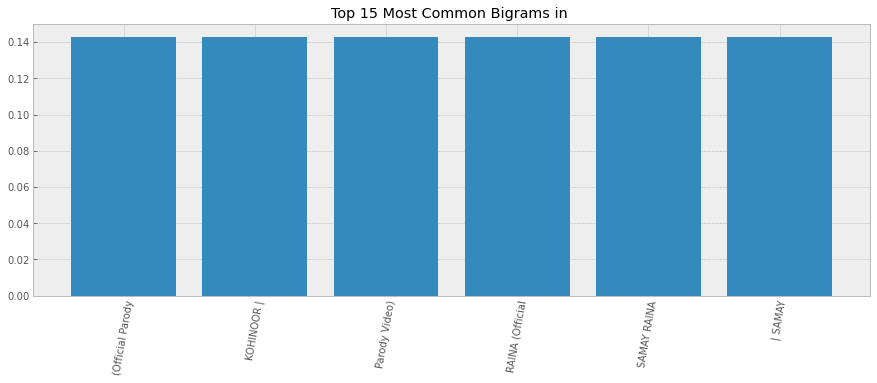

In [21]:
from nltk import BigramAssocMeasures, BigramCollocationFinder
import matplotlib.pyplot as plt

categories = df1['category_id'].unique()

for category in categories:
    # Filter the dataframe to only include titles in the current category
    titles = df1[df1['category_id'] == category]['title']
    
    # Combine all titles into a single string
    all_titles = ' '.join(titles)
    
    # Tokenize the string into individual words
    words = all_titles.split()
    
    # Create a list of bigrams in the titles
    bigrams = list(nltk.bigrams(words))
    
    # Instantiate the score of each bigram
    bigram_meas = BigramAssocMeasures()
    
    # Find and rank the bigrams in the titles
    title_finder = BigramCollocationFinder.from_words(words)
    title_scored = title_finder.score_ngrams(bigram_meas.raw_freq)
    
    # Create a list of the top 25 most common bigrams
    bg = list(map(lambda x: x[0][0] + ' ' + x[0][1], title_scored[:15]))
    title_scores = list(map(lambda x: x[1], title_scored[:15]))
    bigrams = list(zip(bg, title_scores))
    
    # Plot the most common bigrams
    plt.style.use('bmh')
    plt.figure(figsize=(15,5))
    plt.bar(*zip(*bigrams))
    plt.xticks(rotation=80)
    plt.title(f'Top 15 Most Common Bigrams in ')
    plt.show()


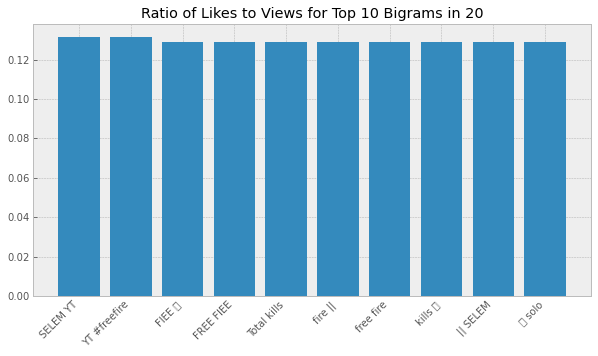

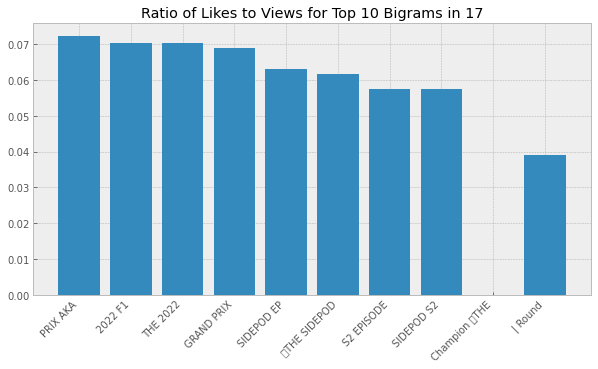

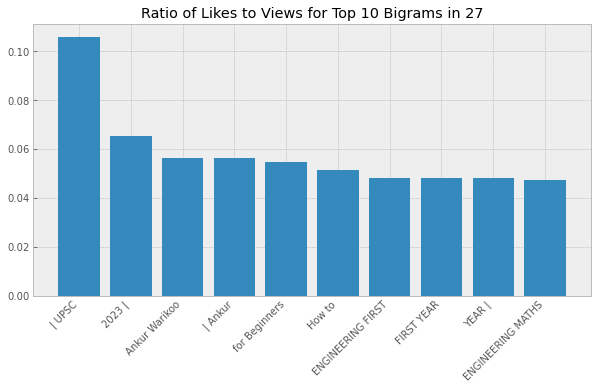

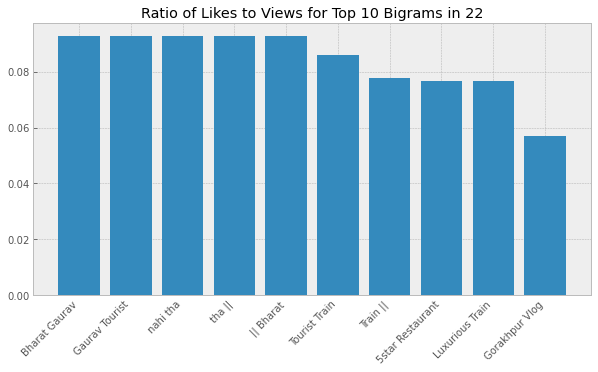

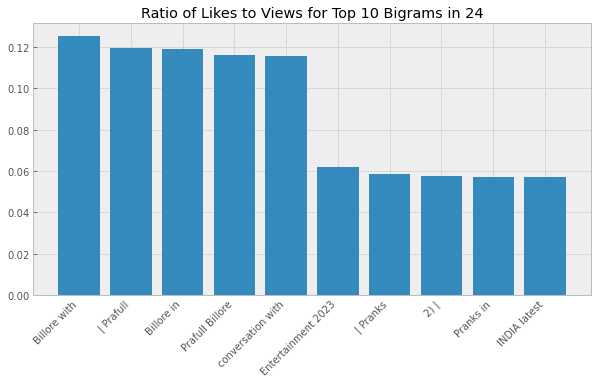

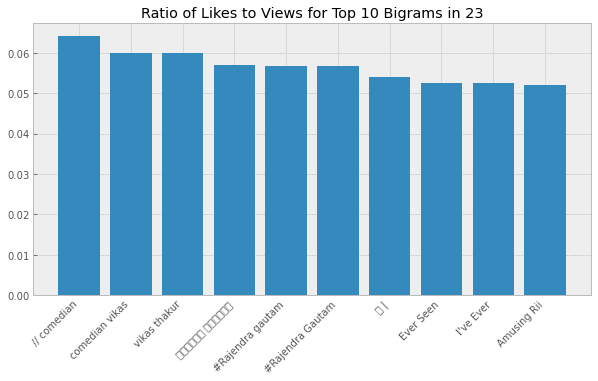

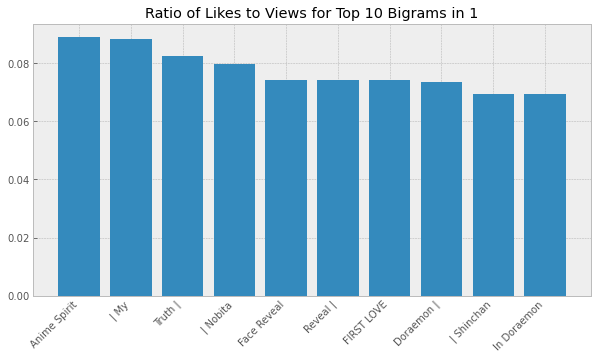

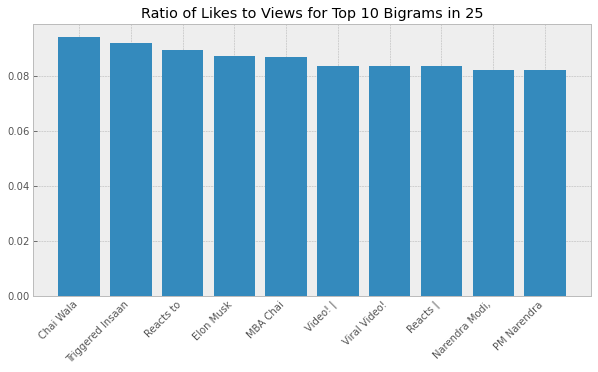

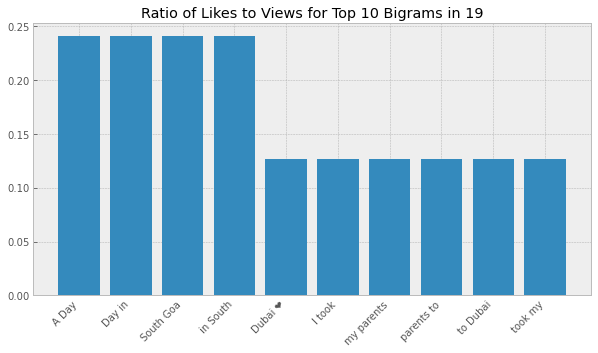

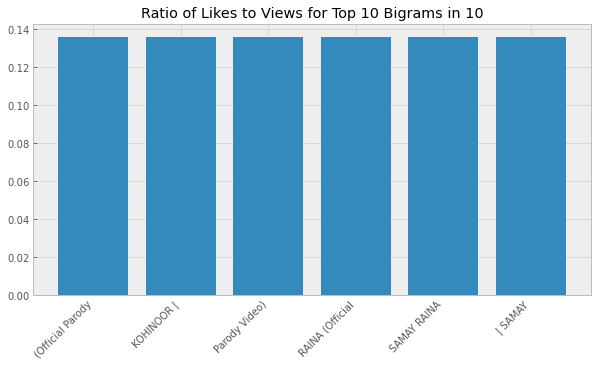

In [22]:
from nltk import BigramAssocMeasures, BigramCollocationFinder
import matplotlib.pyplot as plt
import re
categories = df1['category_id'].unique()

for category in categories:
    # Filter the dataframe to only include titles in the current category
    titles = df1[df1['category_id'] == category]['title']
    
    # Combine all titles into a single string
    all_titles = ' '.join(titles)
    
    # Tokenize the string into individual words
    words = all_titles.split()
    
    # Create a list of bigrams in the titles
    bigrams = list(nltk.bigrams(words))
    
    # Instantiate the score of each bigram
    bigram_meas = BigramAssocMeasures()
    
    # Find and rank the bigrams in the titles
    title_finder = BigramCollocationFinder.from_words(words)
    title_scored = title_finder.score_ngrams(bigram_meas.raw_freq)
    
    # Create a list of the top 25 most common bigrams
    bg = list(map(lambda x: x[0][0] + ' ' + x[0][1], title_scored[:25]))
    title_scores = list(map(lambda x: x[1], title_scored[:25]))
    bigrams = list(zip(bg, title_scores))
    
    # Create a dictionary to store the ratio of likes to views for each bigram
    bigram_ratios = {}
    
    # Iterate through each bigram
    for bigram in bigrams:
        # Filter the dataframe to only include titles with the current bigram
        bigram_titles = df1[df1['title'].str.contains(re.escape(bigram[0])) & (df1['category_id'] == category)]

        
        # Calculate the ratio of likes to views for the current bigram
        likes = bigram_titles['likes'].sum()
        views = bigram_titles['view_count'].sum()
        ratio = likes / views
        
        # Add the ratio to the dictionary
        bigram_ratios[bigram[0]] = ratio
    
    # Sort the bigrams by their ratio of likes to views
    sorted_bigrams = sorted(bigram_ratios.items(), key=lambda x: x[1], reverse=True)
    
    # Create a bar chart of the ratios for the top 10 bigrams
    top_bigrams = sorted_bigrams[:10]
    bigram_names = [x[0] for x in top_bigrams]
    bigram_ratios = [x[1] for x in top_bigrams]
    plt.figure(figsize=(10, 5))
    plt.bar(bigram_names, bigram_ratios)
    plt.title(f'Ratio of Likes to Views for Top 10 Bigrams in {category}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


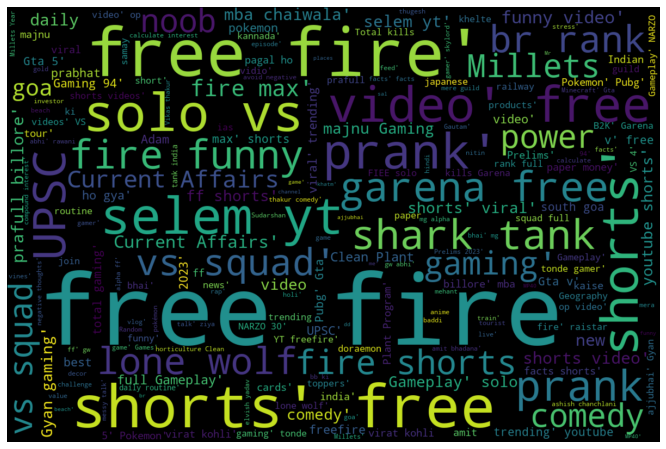

In [34]:
# calculate likes to view ratio for each tag
df1['likes_to_views_ratio'] = df1['likes'] / df1['view_count']
# define a function to extract words from each tag
def extract_words(tag):
    # remove special characters and digits
    tag = re.sub('[^a-zA-Z]+', ' ', tag)
    # convert to lowercase and split into words
    words = tag.lower().split()
    return words

# apply the extract_words function to the 'tags' column and concatenate the resulting lists
tags = df1['tags'].apply(extract_words).sum()
# group the tags by their average ratio
tag_ratio = df1.groupby('tags')['likes_to_views_ratio'].mean().reset_index()

# sort the tags based on their ratio in descending order
sorted_tags = tag_ratio.sort_values(by='likes_to_views_ratio', ascending=False)

# take top 50 tags based on their ratio
top_tags = sorted_tags.head(50)

import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt




# generate word cloud
wordcloud = WordCloud(width=1200, height=800, stopwords=set(STOPWORDS)).generate(' '.join(top_tags['tags']))

# plot the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

     


In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width=1200, height= 800,stopwords=set(STOPWORDS)).generate(tags)

# analysis

Text(0.5, 1.0, 'Regression plot of views and likes')

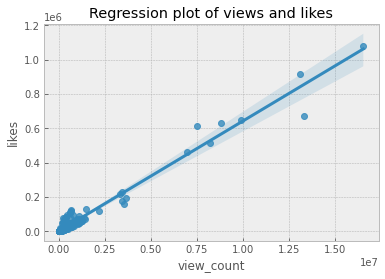

In [27]:
import seaborn as sns
sns.regplot(data=df1, x='view_count', y='likes') #ploting a regression of views and likes
plt.title("Regression plot of views and likes")
     

In [29]:
correlation_videos = df1[['view_count','likes']]

In [30]:
correlation_videos.corr()

,view_count,likes
view_count,1.000000,0.983709
likes,0.983709,1.000000


<AxesSubplot:>

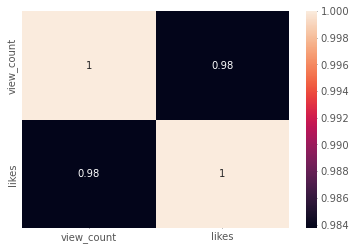

In [31]:

sns.heatmap(correlation_videos.corr(), annot=True)
     